In [1]:
from reinforce_lake import PolicyNetwork, reinforce
from spsa_lake import spsa
from torch import optim
import gym
import matplotlib.pyplot as plt
import pandas as pd
import torch
import numpy as np
from gridworld import CustomGridWorld


In [2]:
def run_with_seed(seed):
    torch.manual_seed(seed)
    env = CustomGridWorld(4, 0.2, 50)
    n_actions = 4
    n_features = 6  # Based on our extract_features function

    policy = PolicyNetwork(n_features, n_actions)
    optimizer = optim.Adam(policy.parameters(), lr=3e-4)

    results = reinforce(env, policy, optimizer, 20000, 0.99, 1)
    return results


In [3]:
results = [
    run_with_seed(seed) for seed in range(10)
]


Episode 0, Loss: 478.6179504394531, G=7.102080883764476
Episode 1000, Loss: 260.1124572753906, G=10.728241918357302
Episode 2000, Loss: 291.0296630859375, G=10.994516481900794
Episode 3000, Loss: 256.3277893066406, G=11.451853874161285
Episode 4000, Loss: 98.57215118408203, G=13.590698352551788
Episode 5000, Loss: 165.28260803222656, G=12.773243455336008
Episode 6000, Loss: 88.30105590820312, G=14.081008436921
Episode 7000, Loss: 237.60247802734375, G=11.413183933906282
Episode 8000, Loss: 66.79500579833984, G=14.4757660979
Episode 9000, Loss: 120.50482940673828, G=14.179513436920999
Episode 10000, Loss: 136.90257263183594, G=12.542212526260672
Episode 11000, Loss: 211.49911499023438, G=11.736167015863142
Episode 12000, Loss: 72.6575927734375, G=14.130508436921
Episode 13000, Loss: 56.2175407409668, G=14.4757660979
Episode 14000, Loss: 125.19827270507812, G=13.394964629491321
Episode 15000, Loss: 64.53273010253906, G=14.4757660979
Episode 16000, Loss: 218.40196228027344, G=11.804066033

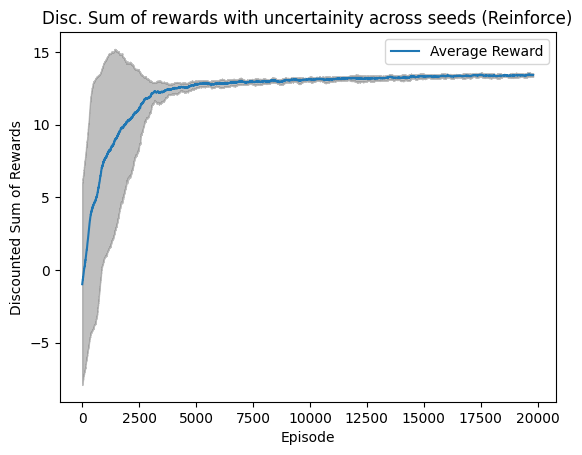

In [4]:
import numpy as np
rolled_up = []
for result in results:
    r = pd.Series(result).rolling(200).mean().dropna()
    rolled_up.append(r)
rolled_up = np.array(rolled_up)

avg_rewards = rolled_up.mean(0)
std_rewards = rolled_up.std(0)

plt.plot(avg_rewards, label="Average Reward")
plt.fill_between(range(len(avg_rewards)), avg_rewards - std_rewards, avg_rewards + std_rewards, color='gray', alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Discounted Sum of Rewards')
plt.title('Disc. Sum of rewards with uncertainity across seeds (Reinforce)')
plt.legend()
plt.show()
